In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
noise.shape

(1000000,)

In [6]:
y_true = (0.5 * x_data) + 5 + noise
y_true.shape

(1000000,)

In [7]:
x_df = pd.DataFrame(data = x_data, columns=['x data'])

In [8]:
y_df = pd.DataFrame(data = y_true, columns=['y data'])

In [9]:
y_df.head()

,y data
0,4.159175
1,4.953214
2,5.073686
3,4.882262
4,5.527377


In [10]:
my_data = pd.concat([x_df, y_df], axis=1)

In [11]:
my_data

,x data,y data
0,0.00000,4.159175
1,0.00001,4.953214
2,0.00002,5.073686
3,0.00003,4.882262
4,0.00004,5.527377
5,0.00005,5.595774
6,0.00006,5.016767
7,0.00007,3.860978
8,0.00008,3.286816
9,0.00009,5.054122


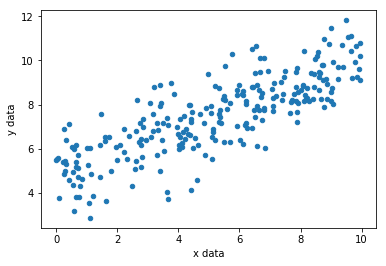

In [12]:
my_data.sample(n=250).plot(kind='scatter',x='x data',y='y data')

In [13]:
batch_size =8

In [14]:
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [15]:
xph = tf.placeholder(tf.float32, [batch_size])

In [16]:
yph = tf.placeholder(tf.float32, [batch_size])

In [17]:
y_model = m * xph + b

In [18]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [19]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [20]:
init = tf.global_variables_initializer()

In [21]:
with tf.Session() as sess:
    sess.run(init)
    batches =10000 
    for i in range(batches):
        rand_int = np.random.randint(len(x_data), size = batch_size)
        feed = {xph:x_data[rand_int], yph: y_true[rand_int]}
        sess.run(train, feed_dict =feed)
    model_m, model_b = sess.run([m,b])

In [22]:
model_m

0.44568464

In [23]:
model_b

5.014545

In [24]:
y_hat = x_data * model_m + model_b

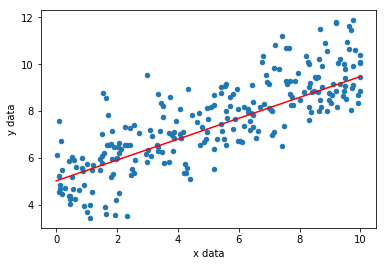

In [25]:
my_data.sample(250).plot(kind = 'scatter', x='x data', y='y data')
plt.plot(x_data, y_hat, 'r')

In [26]:
a=[1,2,3]
b=['a','b','c']
result = zip(a,b)

In [27]:
print(list(result))

[(1, 'a'), (2, 'b'), (3, 'c')]


In [28]:
rand_int = np.random.randint(5, size = batch_size)

In [29]:
rand_int

array([3, 1, 0, 2, 1, 0, 4, 4])

# TF Estimator

In [30]:
feature_cols = [ tf.feature_column.numeric_column('x', shape=[1])]

In [31]:
feature_cols

[_NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [32]:
estimator = tf.estimator.LinearRegressor(feature_columns=feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ASUSPC~1\\AppData\\Local\\Temp\\tmpkudan4n1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023F9DBCF940>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size =0.3,random_state=101)

In [35]:
x_train.shape

(700000,)

In [36]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train,
                                               batch_size=8, num_epochs=None, 
                                                shuffle =True)

In [37]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train,
                                               batch_size=8, num_epochs=1000, 
                                                shuffle =False)

In [38]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_test}, y_test,
                                               batch_size=8, num_epochs=1000, 
                                                shuffle =False)

In [39]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ASUSPC~1\AppData\Local\Temp\tmpkudan4n1\model.ckpt.
INFO:tensorflow:loss = 434.832, step = 1
INFO:tensorflow:global_step/sec: 288.626
INFO:tensorflow:loss = 25.4578, step = 101 (0.351 sec)
INFO:tensorflow:global_step/sec: 354.803
INFO:tensorflow:loss = 24.8189, step = 201 (0.281 sec)
INFO:tensorflow:global_step/sec: 349.315
INFO:tensorflow:loss = 7.86487, step = 301 (0.287 sec)
INFO:tensorflow:global_step/sec: 361.949
INFO:tensorflow:loss = 16.7901, step = 401 (0.277 sec)
INFO:tensorflow:global_step/sec: 364.418
INFO:tensorflow:loss = 14.6565, step = 501 (0.274 sec)
INFO:tensorflow:global_step/sec: 364.619
INFO:tensorflow:loss = 10.6583, step = 601 (0.273 sec)
INFO:tensorflow:global_step/sec: 353.626
INFO:tensorflow:loss = 8.93184, step = 701 (0.284 sec)
INFO:tensorflow:global_step/sec: 346.226
INFO:tensorflow:loss = 13.8805, step = 801 (0.288 sec)
INFO:tensorflow:global_step/sec: 351.066

In [40]:
train_matrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2017-12-20-04:06:02
INFO:tensorflow:Restoring parameters from C:\Users\ASUSPC~1\AppData\Local\Temp\tmpkudan4n1\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [2

INFO:tensorflow:Evaluation [215/1000]
INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [430/1000]
INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [646/1000]
INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [862/1000]
INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorf

In [41]:
test_matrics = estimator.evaluate(input_fn=test_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2017-12-20-04:06:08
INFO:tensorflow:Restoring parameters from C:\Users\ASUSPC~1\AppData\Local\Temp\tmpkudan4n1\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [2

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorf

In [42]:
print('Training Data matrics:')
print(train_matrics)
print('Testing Data matrics:')
print(test_matrics)

Training Data matrics:
{'average_loss': 1.0934412, 'loss': 8.74753, 'global_step': 1000}
Testing Data matrics:
{'average_loss': 1.0811983, 'loss': 8.6495867, 'global_step': 1000}


In [43]:
brand_new_data = np.linspace(0, 10, 10)

In [44]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},
                                                      shuffle=False)

In [45]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from C:\Users\ASUSPC~1\AppData\Local\Temp\tmpkudan4n1\model.ckpt-1000


[{'predictions': array([ 4.44853067], dtype=float32)},
 {'predictions': array([ 5.09495544], dtype=float32)},
 {'predictions': array([ 5.74138021], dtype=float32)},
 {'predictions': array([ 6.38780499], dtype=float32)},
 {'predictions': array([ 7.03422976], dtype=float32)},
 {'predictions': array([ 7.68065453], dtype=float32)},
 {'predictions': array([ 8.32707882], dtype=float32)},
 {'predictions': array([ 8.97350407], dtype=float32)},
 {'predictions': array([ 9.61992836], dtype=float32)},
 {'predictions': array([ 10.26635361], dtype=float32)}]

In [46]:
predictions = []
for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\ASUSPC~1\AppData\Local\Temp\tmpkudan4n1\model.ckpt-1000


In [47]:
predictions

[array([ 4.44853067], dtype=float32),
 array([ 5.09495544], dtype=float32),
 array([ 5.74138021], dtype=float32),
 array([ 6.38780499], dtype=float32),
 array([ 7.03422976], dtype=float32),
 array([ 7.68065453], dtype=float32),
 array([ 8.32707882], dtype=float32),
 array([ 8.97350407], dtype=float32),
 array([ 9.61992836], dtype=float32),
 array([ 10.26635361], dtype=float32)]

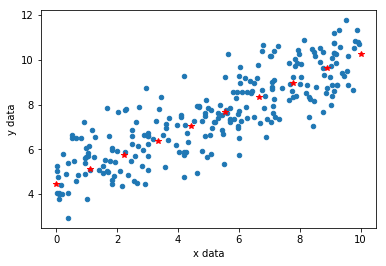

In [48]:
my_data.sample(250).plot(kind = 'scatter', x='x data', y='y data')
plt.plot(brand_new_data, predictions, 'r*')